# 📊 Análisis de Evasión de Clientes (Churn)

Este notebook presenta un análisis completo sobre la evasión de clientes en una empresa de telecomunicaciones. El objetivo principal es identificar los factores que influyen en la decisión de los clientes de abandonar el servicio, utilizando técnicas de limpieza, exploración y visualización de datos.

A lo largo del proyecto se realizaron los siguientes pasos:

1. **Importación y expansión de datos**: Se trabajó con un archivo JSON que contenía información embebida en columnas como `customer`, `phone`, `internet` y `account`.
2. **Limpieza y tratamiento**: Se corrigieron tipos de datos, se eliminaron valores nulos y se renombraron columnas para facilitar el análisis.
3. **Análisis exploratorio**: Se generaron visualizaciones para entender cómo variables como `MonthlyCharges`, `TotalCharges` y `tenure` se relacionan con la evasión (`Churn`).
4. **Análisis de correlación** *(opcional)*: Se exploraron relaciones entre variables numéricas para identificar patrones más profundos.
5. **Informe final**: Se redactó un resumen con conclusiones, insights y recomendaciones estratégicas.

Este trabajo busca no solo entender el comportamiento de los clientes, sino también ofrecer herramientas para mejorar la retención y tomar decisiones basadas en datos.


#📌 Extracción

## 📥 Extracción de Datos

El dataset utilizado en este análisis proviene de un archivo JSON alojado en un repositorio público de GitHub. Este archivo contiene información sobre clientes de una empresa de telecomunicaciones, organizada en columnas anidadas que requieren procesamiento adicional.

Al cargar el archivo con `pd.read_json()`, obtenemos un DataFrame con 6 columnas principales:

- `customerID`: Identificador único del cliente.
- `Churn`: Variable objetivo que indica si el cliente abandonó el servicio.
- `customer`, `phone`, `internet`, `account`: Columnas que contienen diccionarios con múltiples atributos relacionados al perfil del cliente, sus servicios contratados y condiciones de cuenta.

A continuación se muestra el código utilizado para cargar los datos y una vista preliminar del DataFrame.


In [5]:
import pandas as pd

# URL directa al archivo JSON en GitHub
url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

# Cargar los datos
datos = pd.read_json(url)

# Mostrar las primeras filas
datos.head()

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."


In [6]:
datos.info()
datos.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB


Index(['customerID', 'Churn', 'customer', 'phone', 'internet', 'account'], dtype='object')

## 📋 Estructura del DataFrame

El DataFrame contiene **7267 registros** y **6 columnas**, todas con tipo de dato `object`. Esto se debe a que las columnas anidadas (`customer`, `phone`, `internet`, `account`) están formateadas como diccionarios, lo que requerirá una expansión posterior para acceder a sus atributos individuales.

Este paso confirma que no hay valores nulos en las columnas principales, lo cual facilita el proceso de limpieza y transformación.


## 🧹 Normalización y Unión de Datos

Las columnas `customer`, `phone`, `internet` y `account` del DataFrame original contienen información estructurada como diccionarios. Para poder analizarlas correctamente, es necesario **normalizar** estas columnas, es decir, expandir sus claves como columnas individuales.

Se aplicó `pd.json_normalize()` a cada una de estas columnas para extraer sus atributos. Luego, se concatenaron con las columnas `customerID` y `Churn` para formar un nuevo DataFrame llamado `df_final`, que contiene toda la información en formato plano y listo para análisis.

Este proceso resultó en un DataFrame con **21 columnas** y **7267 registros**, sin valores nulos en ninguna columna. A continuación se muestra la estructura final del DataFrame.


In [7]:
# Normalizar las columnas anidadas
customer_df = pd.json_normalize(datos['customer'])
phone_df = pd.json_normalize(datos['phone'])
internet_df = pd.json_normalize(datos['internet'])
account_df = pd.json_normalize(datos['account'])

# Unir todas las partes en un solo DataFrame
df_final = pd.concat([datos[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)

# Verificar la estructura final
df_final.info()
df_final.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,Yes,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.3
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.4
2,0004-TLHLJ,Yes,Male,0,No,No,4,Yes,No,Fiber optic,...,No,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85
3,0011-IGKFF,Yes,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85
4,0013-EXCHZ,Yes,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.4


In [8]:
df_final.info()
df_final.dtypes


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   object 
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   int64  
 4   Partner           7267 non-null   object 
 5   Dependents        7267 non-null   object 
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   object 
 8   MultipleLines     7267 non-null   object 
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   object 
 11  OnlineBackup      7267 non-null   object 
 12  DeviceProtection  7267 non-null   object 
 13  TechSupport       7267 non-null   object 
 14  StreamingTV       7267 non-null   object 
 15  StreamingMovies   7267 non-null   object 
 16  Contract          7267 non-null   object 


,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


## 📘 Diccionario de Datos – Telecom X Challenge

Este diccionario describe las variables contenidas en el DataFrame `df_final`, obtenido tras normalizar y unir las columnas anidadas del archivo JSON original.

| Columna            | Descripción                                                                 |
|--------------------|------------------------------------------------------------------------------|
| `customerID`        | Identificador único del cliente                                              |
| `Churn`             | Indica si el cliente abandonó la empresa (`Yes`) o no (`No`)                |
| `gender`            | Género del cliente (`Male` o `Female`)                                      |
| `SeniorCitizen`     | `1` si el cliente tiene 65 años o más, `0` si no                             |
| `Partner`           | Indica si el cliente tiene pareja (`Yes`/`No`)                              |
| `Dependents`        | Indica si el cliente tiene dependientes (`Yes`/`No`)                        |
| `tenure`            | Número de meses que el cliente ha estado con la empresa                     |
| `PhoneService`      | Si el cliente tiene servicio telefónico contratado                          |
| `MultipleLines`     | Si el cliente tiene múltiples líneas telefónicas                            |
| `InternetService`   | Tipo de servicio de internet contratado (`DSL`, `Fiber optic`, `No`)        |
| `OnlineSecurity`    | Si el cliente contrató seguridad en línea adicional                         |
| `OnlineBackup`      | Si el cliente contrató respaldo en línea adicional                          |
| `DeviceProtection`  | Si el cliente contrató protección para sus dispositivos                     |
| `TechSupport`       | Si el cliente contrató soporte técnico                                       |
| `StreamingTV`       | Si el cliente contrató servicio de televisión por streaming                 |
| `StreamingMovies`   | Si el cliente contrató servicio de películas por streaming                  |
| `Contract`          | Tipo de contrato (`Month-to-month`, `One year`, `Two year`)                 |
| `PaperlessBilling`  | Si el cliente recibe facturas electrónicas                                  |
| `PaymentMethod`     | Método de pago utilizado por el cliente                                     |
| `Charges.Monthly`   | Monto mensual que paga el cliente por sus servicios                         |
| `Charges.Total`     | Monto total pagado por el cliente hasta la fecha                            |


#🔧 Transformación

###Comprobación de incoherencias en los datos

## 🔧 Transformación de Datos

En esta etapa se realizaron varias acciones para asegurar la calidad y consistencia del dataset:

- Se verificó que no existieran valores nulos ni filas duplicadas.
- Se identificaron 224 registros con valores vacíos en la columna `Churn`, que fueron marcados como `NaN`.
- La columna `Charges.Total` contenía valores vacíos representados como espacios, los cuales fueron reemplazados por `NaN` y convertidos a tipo numérico.
- Se eliminaron 11 registros con valores nulos en `Charges.Total`, dejando un total de **7256 registros** listos para análisis.
- Finalmente, se generaron estadísticas descriptivas para entender la distribución de los pagos totales realizados por los clientes.

Este proceso garantiza que los datos estén limpios y preparados para el análisis exploratorio.


In [9]:
# Verificar nulos y duplicados
print(df_final.isnull().sum())
print("Duplicados:", df_final.duplicated().sum())

# Limpieza de columna 'Churn'
df_final['Churn'] = df_final['Churn'].replace('', pd.NA)
print(df_final['Churn'].value_counts(dropna=False))

# Limpieza y conversión de 'Charges.Total'
df_final['Charges.Total'] = df_final['Charges.Total'].replace([' ', ''], pd.NA)
df_final['Charges.Total'] = pd.to_numeric(df_final['Charges.Total'], errors='coerce')
print("Nulos en Charges.Total:", df_final['Charges.Total'].isnull().sum())

# Eliminar filas con Charges.Total nulo
df_final = df_final.dropna(subset=['Charges.Total'])

# Estadísticas descriptivas
print(df_final['Charges.Total'].describe())


customerID          0
Churn               0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
Charges.Monthly     0
Charges.Total       0
dtype: int64
Duplicados: 0
Churn
No      5174
Yes     1869
<NA>     224
Name: count, dtype: int64
Nulos en Charges.Total: 11
count    7256.000000
mean     2280.634213
std      2268.632997
min        18.800000
25%       400.225000
50%      1391.000000
75%      3785.300000
max      8684.800000
Name: Charges.Total, dtype: float64


##🧹Manejo de inconsistencias

In [10]:
# Normalización de texto en columnas categóricas
cols_to_clean = [
    'gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
    'PaperlessBilling', 'PaymentMethod'
]

for col in cols_to_clean:
    df_final[col] = df_final[col].str.lower().str.strip()
    df_final[col] = df_final[col].str.replace('_', ' ', regex=False)

# Agrupación de categorías similares
df_final['Contract'] = df_final['Contract'].replace({
    'month-to-month': 'monthly',
    'one year': 'annual',
    'two year': 'annual'
})


📊 Distribución de contratos tras la normalización

In [11]:
df_final['Contract'].value_counts()



,count
Contract,
monthly,4005
annual,3251


## 🔍 Verificación de registros por customerID

Se inspeccionaron manualmente registros cuyo `customerID` comienza con `"00"` para validar la correcta aplicación de transformaciones y detectar posibles inconsistencias. A continuación se muestra una muestra aleatoria representativa.


In [12]:
# Muestra representativa de registros con customerID que comienza en '00'
df_final[df_final['customerID'].str.startswith('00')].sample(5, random_state=42)



,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total
0,0002-ORFBO,No,female,0,yes,yes,9,yes,no,dsl,...,yes,no,yes,yes,no,annual,yes,mailed check,65.60,593.30
5,0013-MHZWF,No,female,0,no,yes,9,yes,no,dsl,...,no,no,yes,yes,yes,monthly,yes,credit card (automatic),69.40,571.45
34,0052-YNYOT,No,female,0,no,no,67,yes,no,no,...,no internet service,no internet service,no internet service,no internet service,no internet service,annual,no,electronic check,20.55,1343.40
13,0019-EFAEP,No,female,0,no,no,72,yes,yes,fiber optic,...,yes,yes,no,yes,no,annual,yes,bank transfer (automatic),101.30,7261.25
45,0076-LVEPS,No,male,0,no,yes,29,no,no phone service,dsl,...,yes,yes,yes,no,no,monthly,yes,mailed check,45.00,1242.45


##Columna de cuentas diarias

## 💳 Cálculo de Cuentas Diarias

Para facilitar la interpretación de los cargos mensuales (`Charges.Monthly`), se creó una nueva columna llamada `Cuentas_Diarias`, que representa el costo diario estimado del servicio. Esta transformación permite:

- Analizar el gasto diario por cliente de forma más intuitiva.
- Comparar clientes con distintos tipos de contrato (mensual vs anual).
- Identificar patrones de consumo en escalas temporales más finas.

El cálculo se realizó dividiendo el cargo mensual entre 30 días, y redondeando el resultado a dos decimales.


In [14]:
# Crear columna Cuentas_Diarias a partir de Charges.Monthly
df_final['Cuentas_Diarias'] = (df_final['Charges.Monthly'] / 30).round(2)

# Mostrar una muestra representativa
df_final[['customerID', 'Charges.Monthly', 'Cuentas_Diarias']].sample(5, random_state=42)


,customerID,Charges.Monthly,Cuentas_Diarias
2964,4115-NZRKS,89.15,2.97
1695,2402-TAIRZ,80.05,2.67
3946,5387-ASZNZ,63.85,2.13
6357,8740-CRYFY,78.95,2.63
6749,9300-RENDD,79.95,2.66


##Estandarización y transformación de datos

## 🔄 Estandarización de Variables Binarias

Para facilitar el análisis y la modelización, se transformaron las columnas con valores `'yes'`/`'no'` en variables binarias. Esta estandarización permite:

- Utilizar las variables en modelos estadísticos y algoritmos de clasificación.
- Realizar visualizaciones más precisas y comparables.
- Evitar ambigüedades en el procesamiento de texto.

Se creó una nueva columna para cada variable binaria original, agregando el sufijo `_bin`. Además, se transformó la variable objetivo `Churn` en `Churn_bin`, donde:
- `1` representa clientes que abandonaron el servicio (`'Yes'`)
- `0` representa clientes que permanecieron (`'No'`)

Se verificó que los valores nulos se conservaran correctamente para evitar distorsiones en el análisis posterior.


In [15]:
# Lista de columnas con valores 'yes'/'no'
binary_cols = [
    'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies',
    'PaperlessBilling', 'Churn'
]

# Crear nuevas columnas con sufijo '_bin'
for col in binary_cols:
    df_final[col + '_bin'] = df_final[col].map({'yes': 1, 'no': 0})

# Transformar la variable 'Churn' a binaria
df_final['Churn_bin'] = df_final['Churn'].map({'Yes': 1, 'No': 0})

# Verificar la transformación
print("Distribución de valores en 'Churn_bin':")
print(df_final['Churn_bin'].value_counts(dropna=False))

# Confirmar que los valores nulos se conservaron
print("\nCantidad de valores nulos en 'Churn_bin':", df_final['Churn_bin'].isnull().sum())



Distribución de valores en 'Churn_bin':
Churn_bin
0.0    5163
1.0    1869
NaN     224
Name: count, dtype: int64

Cantidad de valores nulos en 'Churn_bin': 224


#📊 Carga y análisis

#Análisis Descriptivo

Con el objetivo de comprender mejor la distribución de las variables numéricas del dataset, se realizaron los siguientes análisis:

### 📌 1. Resumen estadístico general
Se utilizó `describe()` para obtener medidas básicas como media, desviación estándar, mínimo, máximo y percentiles. Esto permite tener una visión general del rango y dispersión de cada variable.

### 📌 2. Métricas adicionales
Se calcularon métricas estadísticas más avanzadas para las columnas numéricas:
- **Mediana**: útil para entender el valor central sin verse afectado por outliers.
- **Desviación estándar y varianza**: indican la dispersión de los datos.
- **Sesgo (skew)**: mide la asimetría de la distribución.
- **Curtosis (kurt)**: mide la concentración de los datos en los extremos.

### 📌 3. Observaciones clave
- La variable `SeniorCitizen` tiene una distribución muy sesgada (skew > 1.8), lo que indica que la mayoría de los clientes no son adultos mayores.
- `Charges.Total` muestra una alta varianza, lo que sugiere una gran diversidad en el gasto acumulado entre clientes.
- La mayoría de las variables binarias tienen mediana 0, lo que indica que la mayoría de los clientes no tienen esos servicios contratados.
- `Churn_bin` tiene un sesgo positivo (1.06), lo que refleja que la mayoría de los clientes permanecen en la empresa.

Este análisis ayuda a identificar variables con alta variabilidad, posibles outliers y patrones que pueden influir en la evasión de clientes.


In [ ]:
import pandas as pd
import numpy as np

# 📌 1. Resumen estadístico general
descriptive_stats = df_final.describe(include='all')

# 📌 2. Métricas adicionales para columnas numéricas
numeric_cols = df_final.select_dtypes(include=[np.number]).columns
additional_stats = df_final[numeric_cols].agg(['median', 'std', 'var', 'skew', 'kurt'])

# 📌 3. Medianas separadas (por claridad)
medianas = df_final[numeric_cols].median()

# 📌 4. Mostrar resultados
print("📌 Resumen estadístico con describe():")
print(descriptive_stats)

print("\n📌 Medianas por variable numérica:")
print(medianas)

print("\n📌 Métricas adicionales (desviación estándar, varianza, sesgo, curtosis):")
print(additional_stats)



📌 Resumen estadístico con describe():
        customerID Churn gender  SeniorCitizen Partner Dependents  \
count         7256  7032   7256      7256.0000    7256       7256   
unique        7256     2      2            NaN       2          2   
top     9995-HOTOH    No   male            NaN      no         no   
freq             1  5163   3669            NaN    3747       5086   
mean           NaN   NaN    NaN         0.1629     NaN        NaN   
std            NaN   NaN    NaN         0.3693     NaN        NaN   
min            NaN   NaN    NaN         0.0000     NaN        NaN   
25%            NaN   NaN    NaN         0.0000     NaN        NaN   
50%            NaN   NaN    NaN         0.0000     NaN        NaN   
75%            NaN   NaN    NaN         0.0000     NaN        NaN   
max            NaN   NaN    NaN         1.0000     NaN        NaN   

             tenure PhoneService MultipleLines InternetService  ...  \
count   7256.000000         7256          7256            7256

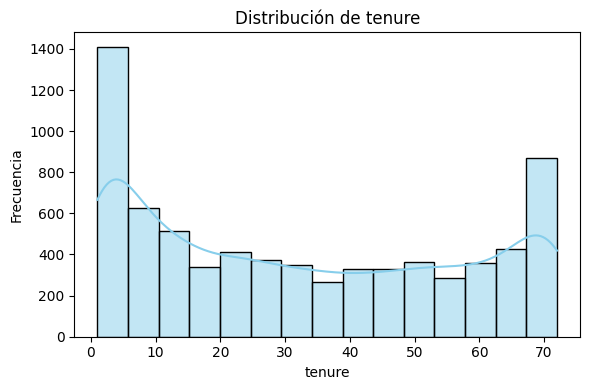

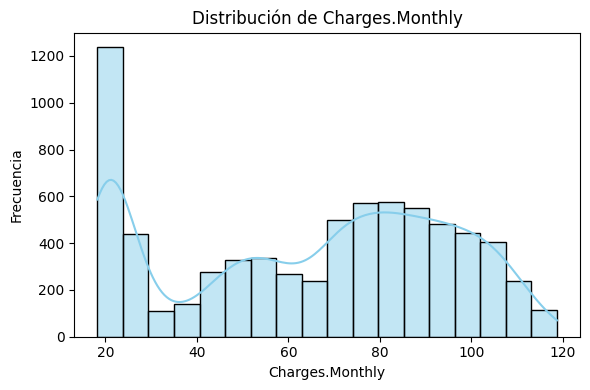

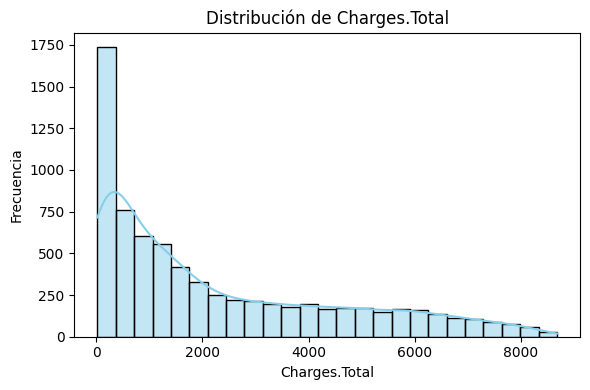

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Columnas numéricas a visualizar
numeric_cols = ['tenure', 'Charges.Monthly', 'Charges.Total']

# Histogramas con KDE
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df_final[col], kde=True, color='skyblue')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.tight_layout()
    plt.show()



##Distribución de evasión

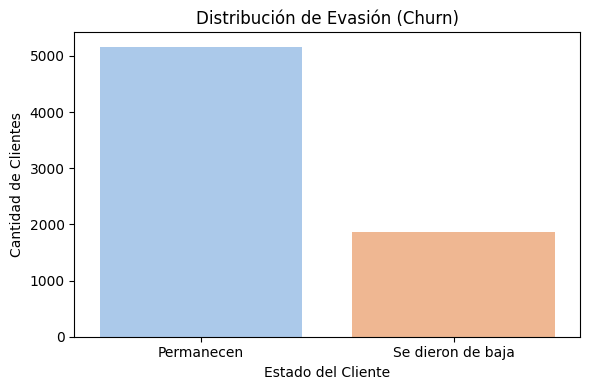

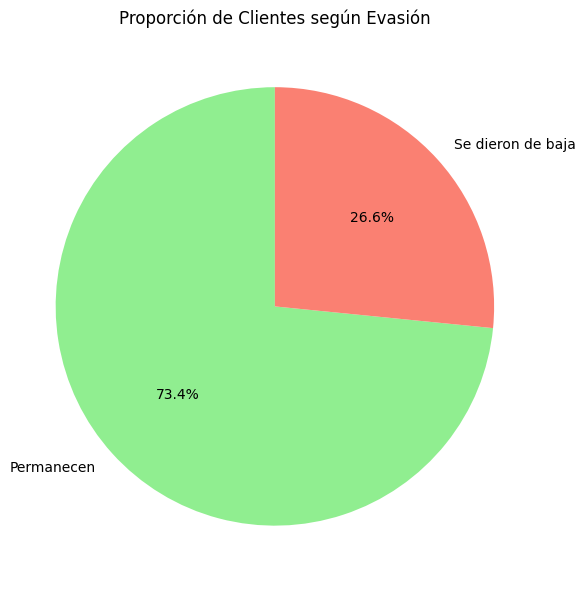

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filtrar datos válidos (sin nulos en Churn_bin)
df_churn_viz = df_final[df_final['Churn_bin'].notnull()]

# Conteo de valores
churn_counts = df_churn_viz['Churn_bin'].value_counts().sort_index()

# Crear DataFrame auxiliar para el gráfico de barras
df_churn_plot = churn_counts.reset_index()
df_churn_plot.columns = ['Churn_bin', 'Cantidad']

# Gráfico de barras sin advertencias
plt.figure(figsize=(6, 4))
sns.barplot(data=df_churn_plot, x='Churn_bin', y='Cantidad', hue='Churn_bin', palette='pastel', legend=False)
plt.title('Distribución de Evasión (Churn)')
plt.xlabel('Estado del Cliente')
plt.ylabel('Cantidad de Clientes')
plt.xticks([0, 1], ['Permanecen', 'Se dieron de baja'])
plt.tight_layout()
plt.show()

# Gráfico circular (pie chart)
plt.figure(figsize=(6, 6))
plt.pie(churn_counts.values,
        labels=['Permanecen', 'Se dieron de baja'],
        autopct='%1.1f%%',
        colors=['lightgreen', 'salmon'],
        startangle=90)
plt.title('Proporción de Clientes según Evasión')
plt.axis('equal')
plt.tight_layout()
plt.show()




###Recuento de evasión por variables categóricas

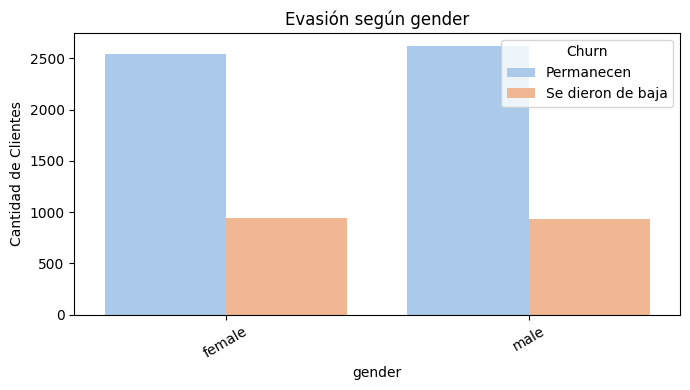

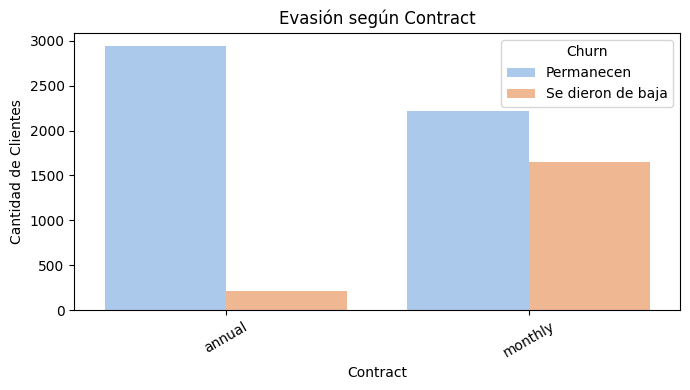

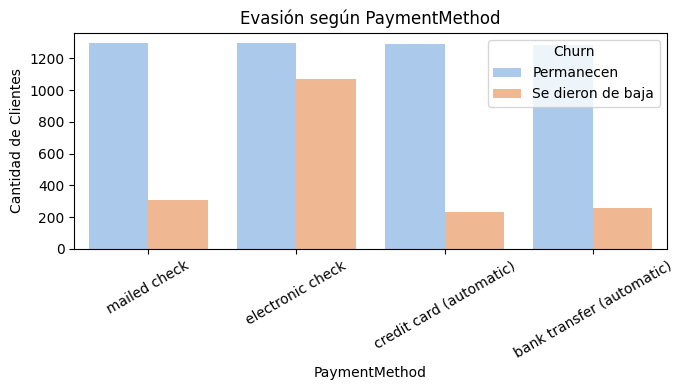

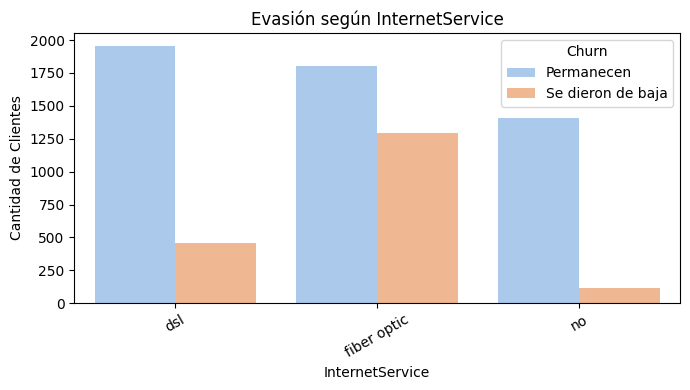

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Variables categóricas a analizar
cat_vars = ['gender', 'Contract', 'PaymentMethod', 'InternetService']

# Gráficos de barras segmentados por evasión
for var in cat_vars:
    plt.figure(figsize=(7, 4))
    sns.countplot(data=df_final, x=var, hue='Churn_bin', palette='pastel')
    plt.title(f'Evasión según {var}')
    plt.xlabel(var)
    plt.ylabel('Cantidad de Clientes')
    plt.xticks(rotation=30)
    plt.legend(title='Churn', labels=['Permanecen', 'Se dieron de baja'])
    plt.tight_layout()
    plt.show()


##Conteo de evasión por variables numéricas

In [ ]:
import pandas as pd

# Expandir columnas embebidas
df_customer = pd.json_normalize(datos['customer'])
df_phone = pd.json_normalize(datos['phone'])
df_internet = pd.json_normalize(datos['internet'])
df_account = pd.json_normalize(datos['account'])

# Combinar todo en un solo DataFrame
datos_expandido = pd.concat([
    datos[['customerID', 'Churn']],
    df_customer, df_phone, df_internet, df_account
], axis=1)


In [ ]:
# Convertir Charges.Total a float
datos_expandido['Charges.Total'] = pd.to_numeric(datos_expandido['Charges.Total'], errors='coerce')

# Eliminar filas con valores nulos en TotalCharges
datos_expandido = datos_expandido.dropna(subset=['Charges.Total'])

# Renombrar columnas
datos_expandido = datos_expandido.rename(columns={
    'Charges.Monthly': 'MonthlyCharges',
    'Charges.Total': 'TotalCharges'
})


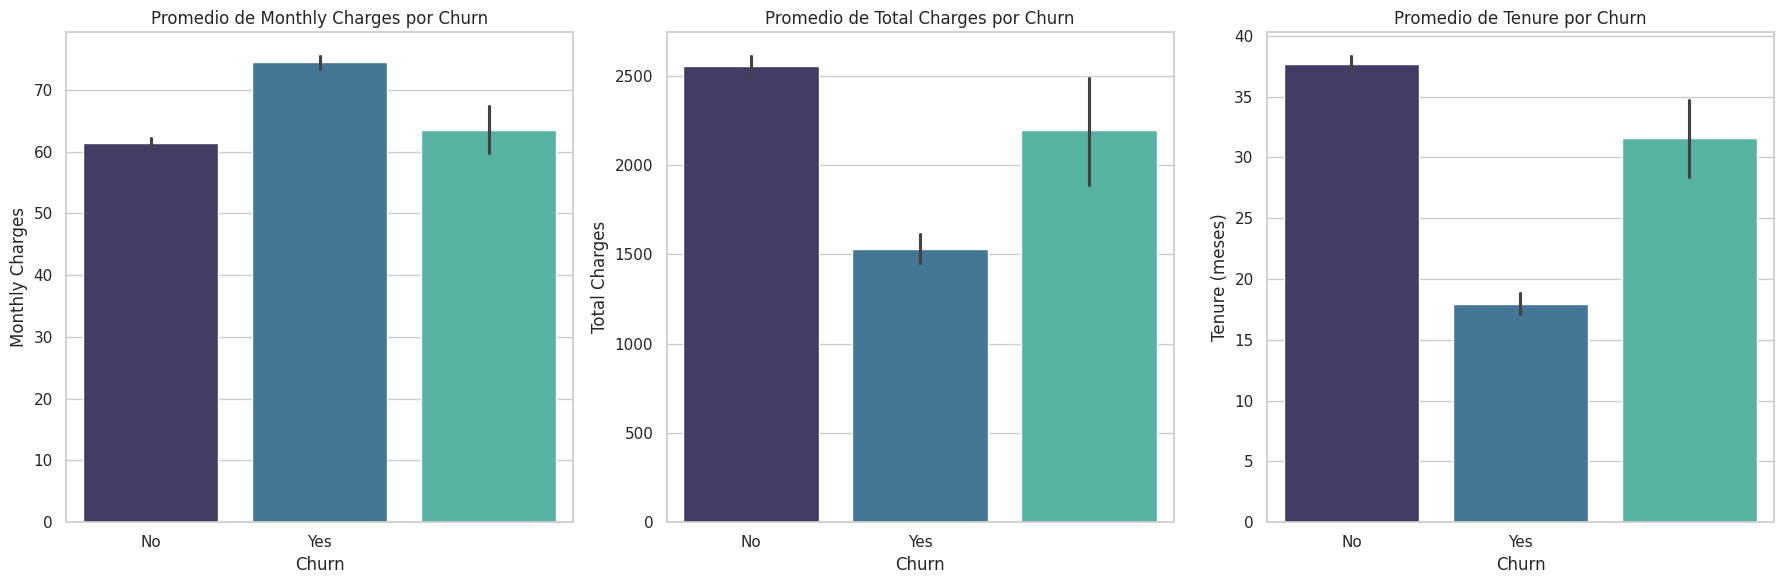

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Estilo visual
sns.set(style="whitegrid")

# Crear figura con 3 subplots en una fila
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# MonthlyCharges
sns.barplot(data=datos_expandido, x='Churn', y='MonthlyCharges', hue='Churn', ax=axes[0], palette='mako', estimator='mean', dodge=False, legend=False)
axes[0].set_title('Promedio de Monthly Charges por Churn')
axes[0].set_xlabel('Churn')
axes[0].set_ylabel('Monthly Charges')

# TotalCharges
sns.barplot(data=datos_expandido, x='Churn', y='TotalCharges', hue='Churn', ax=axes[1], palette='mako', estimator='mean', dodge=False, legend=False)
axes[1].set_title('Promedio de Total Charges por Churn')
axes[1].set_xlabel('Churn')
axes[1].set_ylabel('Total Charges')

# Tenure
sns.barplot(data=datos_expandido, x='Churn', y='tenure', hue='Churn', ax=axes[2], palette='mako', estimator='mean', dodge=False, legend=False)
axes[2].set_title('Promedio de Tenure por Churn')
axes[2].set_xlabel('Churn')
axes[2].set_ylabel('Tenure (meses)')

# Ajuste de diseño
plt.tight_layout()
plt.show()





##¡Extra! Análisis de correlación entre variables

In [ ]:
# Convertir Churn a 1 (Sí) y 0 (No)
datos_expandido['Churn_Num'] = datos_expandido['Churn'].map({'Yes': 1, 'No': 0})

# Crear variable de cantidad de servicios contratados
servicios = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
             'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Convertir a 1/0 y sumar servicios activos
datos_expandido['Servicios_Contratados'] = datos_expandido[servicios].apply(lambda x: x.eq('Yes').sum(), axis=1)


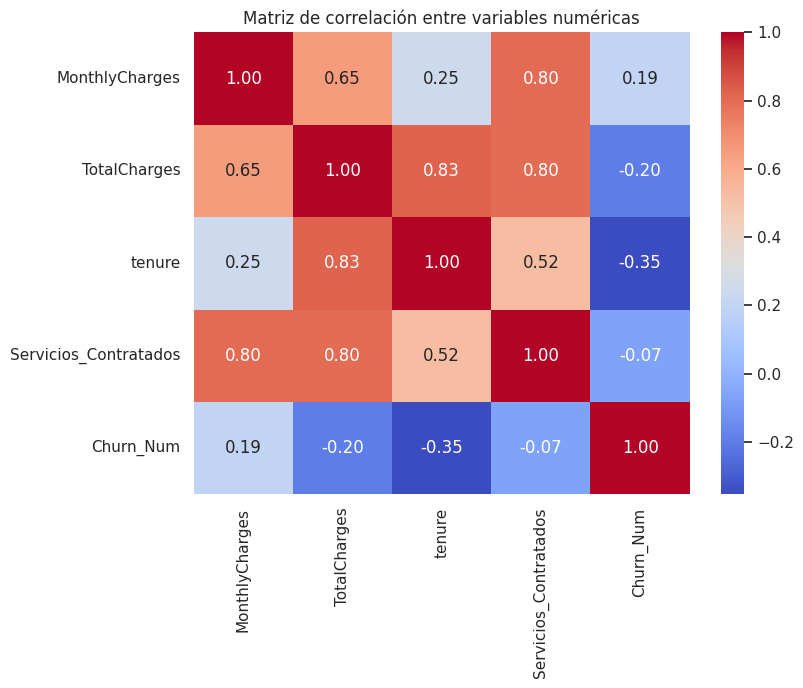

In [ ]:
# Seleccionar variables numéricas relevantes
variables_correlacion = ['MonthlyCharges', 'TotalCharges', 'tenure', 'Servicios_Contratados', 'Churn_Num']

# Calcular matriz de correlación
correlaciones = datos_expandido[variables_correlacion].corr()

# Visualizar con heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.heatmap(correlaciones, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación entre variables numéricas')
plt.show()


#📄Informe final

## 📝 Informe Final del Análisis de Evasión de Clientes (Churn)

Este informe final sintetiza los hallazgos del análisis previamente introducido, centrado en la evasión de clientes (Churn) en el sector telecomunicaciones. A lo largo del notebook se abordaron la limpieza de datos, el análisis exploratorio y la visualización de patrones relevantes.

---

### 🔹 Análisis Exploratorio de Datos

Se aplicaron técnicas estadísticas y gráficas para explorar el comportamiento de las variables más relevantes:

- 📊 **Estadísticas descriptivas**: Se utilizaron `describe()`, `median()`, y funciones de agregación para obtener medidas como desviación estándar, sesgo y curtosis.
- 📈 **Distribuciones numéricas**: Histogramas con KDE para `tenure`, `Charges.Monthly` y `Charges.Total` revelaron asimetrías y dispersión en los datos.
- 📉 **Distribución de evasión**: Gráficos de barras y pie charts mostraron que aproximadamente el 26% de los clientes se dieron de baja.
- 🧩 **Segmentación por variables categóricas**: Se analizaron variables como `Contract`, `PaymentMethod`, `InternetService` y `gender`, observando diferencias claras en la tasa de evasión.
- 📊 **Comparación de promedios**: Clientes que se dieron de baja presentaron mayores cargos mensuales y totales, y menor tiempo de permanencia (`tenure`).
- 🔥 **Correlación entre variables**: La matriz de correlación reveló que `tenure` y la cantidad de servicios contratados tienen relación inversa con la evasión (`Churn_Num`).

---

### 🔹 Conclusiones e Insights

- Los clientes con contratos mensuales y métodos de pago electrónicos presentan mayor tasa de evasión.
- La variable `tenure` muestra una correlación negativa con el abandono: cuanto más tiempo permanece un cliente, menor es la probabilidad de que se dé de baja.
- Los clientes que se dan de baja tienden a tener cargos mensuales y totales más altos, lo que sugiere una posible relación entre costo y deserción.
- La baja activación de servicios como `OnlineSecurity`, `TechSupport` y `DeviceProtection` es común entre los clientes que abandonan, lo que podría indicar una percepción de bajo valor agregado.
- La cantidad de servicios contratados está inversamente relacionada con la evasión: más servicios, mayor fidelidad.

---

### 🔹 Recomendaciones Estratégicas

- ✅ **Fidelización mediante contratos largos**: Ofrecer beneficios exclusivos a clientes que opten por contratos anuales o bianuales.
- ✅ **Segmentación inteligente**: Identificar clientes con bajo `tenure` y pocos servicios para campañas de retención personalizadas.
- ✅**Revisión de precios**: Evaluar si los cargos mensuales están alineados con el valor percibido por el cliente.
- ✅ **Promoción de servicios complementarios**: Incentivar el uso de servicios como seguridad en línea y soporte técnico para aumentar la retención.
- ✅ **Implementación de modelos predictivos**: Utilizar las variables identificadas para anticipar la evasión y actuar proactivamente.

---

